# Notebook for the first baseline model 
Starting with PCA embeddings of RNA, using Linear Regression to predict how a clone responses to vaccination in a late time point, using data from P1 (initial time point) to predcit S1 and T1


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import scirpy as ir
import anndata as ad
import scanpy as sc
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from sklearn.decomposition import PCA

/opt/anaconda3/envs/vaccineSimulator/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get data & explore data

In [3]:
adata = sc.read_h5ad('/Users/juliakuhn/Desktop/uni/WS2425/cmscb/Project_phase/VaccineSimulator/02_dex_annotated_cd8.h5ad')
adata

AnnData object with n_obs × n_vars = 53907 × 18471
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'LTDEMIAQY', 'YTN

In [4]:
adata.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,clr_Isotype_RTK2758,clr_Isotype_RTK4530,clr_CCR7,clr_CD62L,clr_CXCR3,clr_CD45RA,log_clone_size,TCR_mean,TCRC_mean,is_dex+
AAACCTGAGTGTTGAA-1-initial-0-0,True,True,False,[],TRAC,NaN,TRBC1,NaN,396.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.065794,1.511381,False
AAACCTGCACCAGGCT-1-initial-0-0,True,True,False,[],TRAC,NaN,TRBC1,NaN,6164.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.088723,1.310205,False
AAACCTGCATACGCTA-1-initial-0-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,5506.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.484907,0.091682,0.705496,False
AAACGGGAGATGTGGC-1-initial-0-0,True,True,False,[],TRAC,NaN,NaN,NaN,4264.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062257,0.914930,False
AAACGGGGTACGAAAT-1-initial-0-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,680.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.828641,0.064372,1.095210,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCTCTCTGAGA-1-2-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,3450.0,NaN,...,NaN,NaN,0.54596,0.0,0.000000,0.531053,0.000000,0.081136,1.335303,False
TTTGGTTGTTCGGGCT-1-2-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,892.0,NaN,...,NaN,NaN,0.54596,0.0,0.197889,0.287940,1.609438,0.078837,1.086240,False
TTTGGTTTCCACGACG-1-2-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,1186.0,NaN,...,NaN,NaN,0.00000,0.0,0.000000,0.360315,6.993933,0.084793,2.290340,False
TTTGTCACAGCTGCAC-1-2-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,884.0,NaN,...,NaN,NaN,0.00000,0.0,0.000000,0.569542,6.993933,0.065752,1.288824,False


In [5]:
adata.var

,gene_ids,feature_types-0,genome-0,n_cells-0,feature_types-1,genome-1,highly_variable,means,dispersions,dispersions_norm
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,27,Gene Expression,GRCh38,False,0.000874,1.075864,-1.150517
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,441,Gene Expression,GRCh38,False,0.023432,1.259884,-0.108835
LINC01409,ENSG00000237491,Gene Expression,GRCh38,358,Gene Expression,GRCh38,False,0.020166,1.242911,-0.204914
FAM87B,ENSG00000177757,Gene Expression,GRCh38,71,Gene Expression,GRCh38,False,0.003413,1.224581,-0.308672
LINC01128,ENSG00000228794,Gene Expression,GRCh38,1677,Gene Expression,GRCh38,False,0.097386,1.220801,-0.330072
...,...,...,...,...,...,...,...,...,...,...
AL354822.1,ENSG00000278384,Gene Expression,GRCh38,124,Gene Expression,GRCh38,True,0.006435,1.310383,0.177024
AL592183.1,ENSG00000273748,Gene Expression,GRCh38,490,Gene Expression,GRCh38,False,0.022972,1.222385,-0.321103
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,378,Gene Expression,GRCh38,False,0.020251,1.274951,-0.023547
AC004556.3,ENSG00000276345,Gene Expression,GRCh38,274,Gene Expression,GRCh38,False,0.024502,1.221166,-0.328006


In [6]:
print(adata.obs.donor.cat.categories.values)
print(adata.obs.time.cat.categories.values)
adata.obs[['donor','time','experiment']].head(3)

['A02' 'A03' 'A04' 'A05' 'A06' 'A07' 'A08' 'A11' 'A15' 'A16' 'A19' 'A25'
 'A29' 'HIM']
['P1' 'S1' 'S2' 'S3' 'T1' 'T2' 'T3' 'X3' 'extra']


,donor,time,experiment
AAACCTGAGTGTTGAA-1-initial-0-0,A15,S2,first_experiment
AAACCTGCACCAGGCT-1-initial-0-0,A29,S2,first_experiment
AAACCTGCATACGCTA-1-initial-0-0,A15,S2,first_experiment


# Creat RNA Embeddings with PCA
Here, the sc.tl.pca was utlized, with manually selecting the number of principal components with the use of a variance ratio plot. Alternatively, one could use sklearn.PCA  
PCA embeddings are saved automatically in adata.obsm["X_pca"]

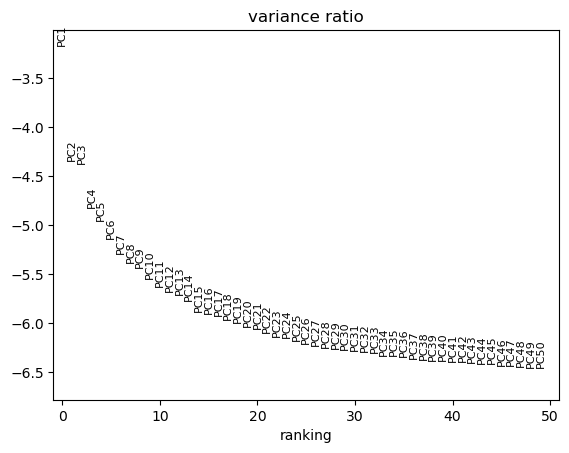

In [7]:
pca_adata = adata.copy()
sc.tl.pca(pca_adata)
sc.pl.pca_variance_ratio(pca_adata, log=True, n_pcs=50) # Elbow plot

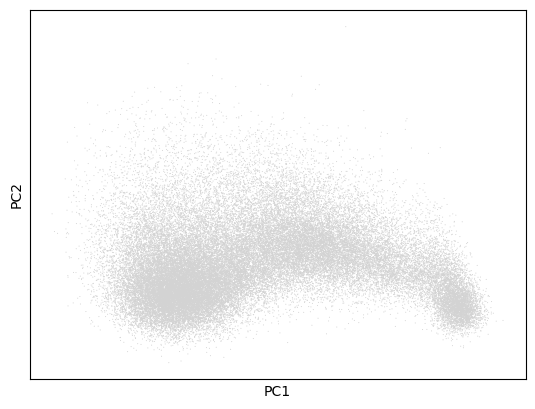

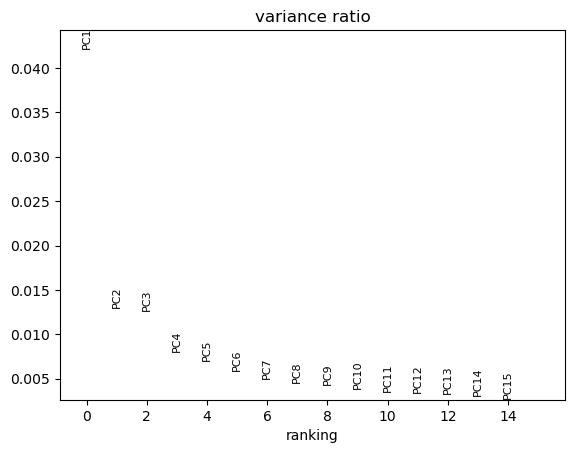

In [8]:
sc.tl.pca(adata, n_comps=15) # Perform PCA -> use 15 components since they explain 90% of the variance (plot)
sc.pl.pca(adata) # Plot only the top two principal components as they are most informative
sc.pl.pca_variance_ratio(adata, n_pcs=15) 

In [9]:
adata.obsm["X_pca"] # check if PCA was stored in adata

array([[ 7.3535986 ,  2.2931406 ,  5.475055  , ..., -0.42037058,
        -0.4918874 , -0.7464614 ],
       [ 8.438536  , -4.2568955 ,  2.3051283 , ...,  2.3662157 ,
         0.5866973 , -0.10710732],
       [-3.9699059 ,  9.784503  ,  1.7513261 , ...,  2.0638952 ,
         2.7388582 , -2.1804142 ],
       ...,
       [-4.5814805 , -1.3408793 ,  1.097489  , ..., -1.1644764 ,
        -1.837859  , -0.43813685],
       [-3.7005851 , -1.7343433 , -1.1275331 , ..., -1.7393358 ,
         0.7136875 ,  0.39432943],
       [-2.0187287 ,  1.9200195 , -4.796518  , ...,  0.9335126 ,
         0.43975925,  0.09896164]], dtype=float32)

# Clone Aggregation and Pairing:
For each clone early and late time point data is paired.
Not all clones in P1 might exist in S1 or T1. Here, we ensure that only clones with valid response scores are included in the model training.

In [10]:
# filter out cells that we can't use
adata = adata[~adata.obs.clone_id.isna()]
adata = adata[~(adata.obs.clone_id=='nan')]
adata = adata[~(adata.obs.time.isin(['X3','extra']))]

In [11]:
# Filter for time points
P1_mask = adata.obs["time"] == "P1"
S1_mask = adata.obs["time"] == "S1"
T1_mask = adata.obs["time"] == "T1"

# Features: Embeddings from P1
X = adata[P1_mask].obsm["X_pca"]

# get target variable and clones from S1 and T1
S1_clones = adata[S1_mask].obs["clone_id"].values  # Clonotypes at S1
S1_targets = adata[S1_mask].obs["IFN Response_score"].values # target variable

T1_clones = adata[T1_mask].obs["clone_id"].values  # Clonotypes at T1
T1_targets = adata[T1_mask].obs["IFN Response_score"].values # target variable
P1_clones = adata[P1_mask].obs["clone_id"].values

# Baseline Model with random cell pairing

In [61]:
from sklearn.linear_model import LinearRegression
# alternative: random pairing of cells - baseline model
# Random pairing of cells
random_indices_s1 = np.random.permutation(len(S1_targets))
random_indices_t1 = np.random.permutation(len(T1_targets))

# Shuffle and align S1 and T1 responses with P1 clones randomly
s1_random = S1_targets[random_indices_s1[:len(P1_clones)]]
t1_random = T1_targets[random_indices_t1[:len(P1_clones)]]

# Aggregate features for training
X_aggregated = []
y_s1_aggregated = []
y_t1_aggregated = []

for clone in np.unique(P1_clones):
    mask = P1_clones == clone  # Select rows for the current clone
    X_aggregated.append(X[mask].mean(axis=0))  # Mean of features
    y_s1_aggregated.append(s1_random[mask].mean())  # Randomized S1 response
    y_t1_aggregated.append(t1_random[mask].mean())  # Randomized T1 response

# Convert to arrays
X_aggregated = np.array(X_aggregated)
y_s1_aggregated = np.array(y_s1_aggregated)
y_t1_aggregated = np.array(y_t1_aggregated)

# Cell Pairing

## Model with Cell Pairing based on timepoints

In [109]:
# Map S1 and T1 responses to corresponding P1 clones to ensure that only clones with corresponding targets are included
s1 = np.array([S1_targets[np.where(S1_clones == cid)[0][0]] if cid in S1_clones else np.nan for cid in P1_clones])
t1 = np.array([T1_targets[np.where(T1_clones == cid)[0][0]] if cid in T1_clones else np.nan for cid in P1_clones])
p1 = np.array([cid for cid in P1_clones])

# Remove clones without corresponding targets
valid_indices = ~np.isnan(s1) & ~np.isnan(t1)
X, s1, t1 = X[valid_indices], s1[valid_indices], t1[valid_indices]
P1_clones = P1_clones[valid_indices]

In [110]:
# get cells per clonotype
clonotype_cell_counts = pd.DataFrame(P1_clones, columns=["Clonotype"]).value_counts().reset_index()
clonotype_cell_counts.columns = ["Clonotype", "Cell Count"]

# Display the counts per clonotype
clonotype_cell_counts.head()

,Clonotype,Cell Count
0,897.0,297
1,926.0,216
2,30.0,160
3,870.0,141
4,171.0,136


In [111]:
adata.obs["clone_id"].value_counts()

clone_id
897.0      2388
30.0       1124
926.0      1090
171.0       995
855.0       747
           ... 
6607.0        1
6608.0        1
6610.0        1
6611.0        1
20300.0       1
Name: count, Length: 12701, dtype: int64

## Cell Pairing based on optimal transport
currently not compatible with the other snippets -> e.g can't use output for train test split based on timepoint

In [13]:
import numpy as np
import ot  # Python Optimal Transport library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# P1 and S1 masks
# Extract target IFN response scores
y_p1 = adata[P1_mask].obs["IFN Response_score"].values
y_s1 = adata[S1_mask].obs["IFN Response_score"].values

# Extract PCA embeddings and target values
X_p1 = adata[P1_mask].obsm["X_pca"]
X_s1 = adata[S1_mask].obsm["X_pca"]

# Compute the cost matrix (Euclidean distances)
cost_matrix = ot.dist(X_p1, X_s1, metric='euclidean')

# Normalize the cost matrix to probabilities
a = np.ones(len(X_p1)) / len(X_p1)  # Uniform distribution over P1 cells
b = np.ones(len(X_s1)) / len(X_s1)  # Uniform distribution over S1 cells

# apply optimal transport library to match
transport_output = ot.emd(a, b, cost_matrix)

# Extract paired indices
paired_indices = np.argwhere(transport_output > 0)
paired_p1_indices = paired_indices[:, 0]
paired_s1_indices = paired_indices[:, 1]

# Extract paired features and targets
paired_features_p1 = X_p1[paired_p1_indices]
paired_features_s1 = X_s1[paired_s1_indices]
paired_targets_p1 = y_p1[paired_p1_indices]
paired_targets_s1 = y_s1[paired_s1_indices]

# Combine paired features (e.g., concatenate or compute differences)
X_regression = np.hstack([paired_features_p1, paired_features_s1])  # Concatenate features
y_s1_regression = paired_targets_s1  # Target is S1 response



In [15]:
# T1 and P1 masks

# Extract target IFN response scores for T1
y_t1 = adata[T1_mask].obs["IFN Response_score"].values

# Extract PCA embeddings for T1
X_t1 = adata[T1_mask].obsm["X_pca"]

# Compute cost matrix between P1 and T1
cost_matrix_t1 = ot.dist(X_p1, X_t1, metric='euclidean')

# Uniform distributions for P1 and T1
a_t1 = np.ones(len(X_p1)) / len(X_p1)
b_t1 = np.ones(len(X_t1)) / len(X_t1)

# Solve the optimal transport problem for P1 and T1
transport_plan_t1 = ot.emd(a_t1, b_t1, cost_matrix_t1)

# Extract paired indices for P1 and T1
paired_indices_t1 = np.argwhere(transport_plan_t1 > 0)
paired_p1_indices_t1 = paired_indices_t1[:, 0]
paired_t1_indices = paired_indices_t1[:, 1]

# Extract paired features and targets for T1
paired_features_p1_t1 = X_p1[paired_p1_indices_t1]
paired_features_t1 = X_t1[paired_t1_indices]
paired_targets_p1_t1 = y_p1[paired_p1_indices_t1]
paired_targets_t1 = y_t1[paired_t1_indices]

# Combine paired features for T1
X_regression_t1 = np.hstack([paired_features_p1_t1, paired_features_t1])
y_regression_t1 = paired_targets_t1  # Target is T1 response

# Combine S1 and T1 datasets
X_combined = np.vstack([X_regression, X_regression_t1])  # Stack P1-S1 and P1-T1 features
y_combined = np.hstack([y_s1_regression, y_regression_t1])  # Stack S1 and T1 targets

In [16]:
# Split data into training and testing sets
X_s1_train, X_s1_test, y_s1_train, y_s1_test = train_test_split(X_regression, y_s1_regression, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = model.predict(X_s1_test)

Recall@5 for S1: 0.60
MSE for S1: 0.012082692235708237
Mean Clonotype Activation (S1): -0.0091


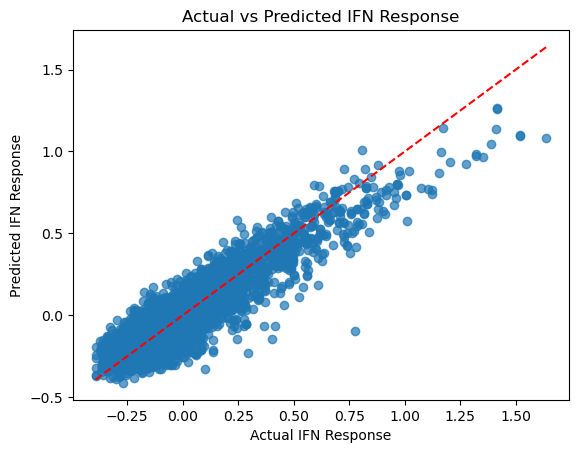

In [18]:
k = 5

# Evaluate S1 predictions
mse_s1 = mean_squared_error(y_s1_test, y_s1_pred)
recall_ks1 = recall_at_k(y_s1_test, y_s1_pred, k)
mean_clonotype_activation_s1 = y_s1_test.mean()# True mean clonotype activation for the test set

print(f"Recall@{k} for S1: {recall_ks1:.2f}")
print(f"MSE for S1: {mse_s1}")
print(f"Mean Clonotype Activation (S1): {mean_clonotype_activation_s1:.4f}")

"""# Evaluate T1 predictions
mse_t1 = mean_squared_error(y_t1_test, y_t1_pred)
recall_kt1 = recall_at_k(y_t1_test, y_t1_pred, k)
#ms2_t1_gbr = mean_squared_error(y_t1_test, y_t1_pred_gbr)
mean_clonotype_activation_t1 = y_t1_test.mean()

print(f"Recall@{k} for T1: {recall_kt1:.2f}")
print(f"MSE for T1: {mse_t1}")
print(f"Mean Clonotype Activation (T1): {mean_clonotype_activation_t1:.4f}")"""

# Plot predictions vs actual values
plt.scatter(y_s1_test, y_s1_pred, alpha=0.7)
plt.plot([y_s1_test.min(), y_s1_test.max()], [y_s1_test.min(), y_s1_test.max()], 'r--')
plt.xlabel("Actual IFN Response")
plt.ylabel("Predicted IFN Response")
plt.title("Actual vs Predicted IFN Response")
plt.show()

## Split into Train-Val-Test

 The splitting is done based on the unique clonotypes (unique_clonotypes_aggregated) to ensure that clones seen in the training set are not present in the test set. Here, a 80-20 split is used.

 Possible options to avoid biases:
 - split to maintain the distribution of responses in both train and test sets
 - additionally divide based on donor or experiment


### Split by Timepoint

In [81]:
from sklearn.model_selection import train_test_split

# Extract unique clonotypes from P1
unique_clonotypes_aggregated = np.unique(P1_clones)

# Train-test split by optimal transport aggregation
train_clonotypes, test_clonotypes  = train_test_split(X_regression, y_s1_regression, test_size=0.2, random_state=42)

# Create masks for train and test sets based on the asigned clonotypes
train_mask = np.isin(unique_clonotypes_aggregated, train_clonotypes)
test_mask = np.isin(unique_clonotypes_aggregated, test_clonotypes)

# Recreate aggregated arrays aligned with unique clonotypes
X_aggregated = []  # features
y_s1_aggregated = [] # target values for s1
y_t1_aggregated = []


# Aggregate features and targets by clone
for clone in unique_clonotypes_aggregated:
    mask = P1_clones == clone  # Select rows matching the current clone
    X_aggregated.append(X[mask].mean(axis=0))  # Mean of features
    y_s1_aggregated.append(s1[mask].mean())      # Mean of s1 for the clone
    y_t1_aggregated.append(t1[mask].mean())      # Mean of t1 for the clone

# Convert lists to arrays
X_aggregated = np.array(X_aggregated)
y_s1_aggregated = np.array(y_s1_aggregated)
y_t1_aggregated = np.array(y_t1_aggregated)


# Split aggregated data into train and test sets
X_s1_train, X_s1_test = X_aggregated[train_mask], X_aggregated[test_mask]
y_s1_train, y_s1_test = y_s1_aggregated[train_mask], y_s1_aggregated[test_mask]
y_t1_train, y_t1_test = y_t1_aggregated[train_mask], y_t1_aggregated[test_mask]

### Alternative: Split- by Donor

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Extract donor information and unique clonotypes
donors = adata.obs["donor"].values  # Donor IDs for each cell
unique_clonotypes = np.unique(P1_clones)  # Unique clonotypes in P1

# Map each clonotype to a donor
clonotype_to_donor = {clone: donors[np.where(P1_clones == clone)[0][0]] for clone in unique_clonotypes}

# Extract unique donors
unique_donors = np.unique(list(clonotype_to_donor.values()))

# Split donors into train and test
train_donors, test_donors = train_test_split(unique_donors, test_size=0.2, random_state=42)

# Create masks for train and test clonotypes based on donors
train_clonotypes = [clone for clone, donor in clonotype_to_donor.items() if donor in train_donors]
test_clonotypes = [clone for clone, donor in clonotype_to_donor.items() if donor in test_donors]

# Aggregate features and targets by clone
X_aggregated = []  # Features
y_s1_aggregated = []  # Target values for S1
y_t1_aggregated = []  # Target values for T1
y_p1_aggregated = []  # Target values for P1

for clone in unique_clonotypes:
    mask = P1_clones == clone  # Select rows matching the current clone
    X_aggregated.append(X[mask].mean(axis=0))  # Mean of features
    # y_p1_aggregated.append(p1[mask].mean())   # Mean of P1 for the clone
    y_s1_aggregated.append(s1[mask].mean())   # Mean of S1 for the clone
    y_t1_aggregated.append(t1[mask].mean())   # Mean of T1 for the clone

# Convert lists to arrays
X_aggregated = np.array(X_aggregated)
y_s1_aggregated = np.array(y_s1_aggregated)
y_t1_aggregated = np.array(y_t1_aggregated)

# Create masks for train and test sets
train_mask = np.isin(unique_clonotypes, train_clonotypes)
test_mask = np.isin(unique_clonotypes, test_clonotypes)

# Split aggregated data into train and test sets
X_s1_train, X_s1_test = X_aggregated[train_mask], X_aggregated[test_mask]
y_s1_train, y_s1_test = y_s1_aggregated[train_mask], y_s1_aggregated[test_mask]
y_t1_train, y_t1_test = y_t1_aggregated[train_mask], y_t1_aggregated[test_mask]

## Train Models
For the first baseline model, a Linear Regression is used, since our goal is to predict a numerical and continuous output value  (=IFN score) based on the input features. One can furthermore tune the parameters to improve this model. 

Possible Arcitectures for future models:
- RandomForest
- SVMs
- NNs

### Baseline model

In [ ]:
# Train-test split (using sklearn's train_test_split)
from sklearn.model_selection import train_test_split

X_s1_train, X_s1_test, y_s1_train, y_s1_test = train_test_split(
    X_aggregated, y_s1_aggregated, test_size=0.2, random_state=42
)

# Train baseline model to predict S1 response
baseline_model_s1 = LinearRegression()
baseline_model_s1.fit(X_s1_train, y_s1_train)

# Predict S1 response
y_s1_pred = baseline_model_s1.predict(X_s1_test)

In [63]:
# True mean clonotype activation for the test set
mean_clonotype_activation_s1 = y_s1_test.mean()

# Evaluate model predictions
mse_s1 = mean_squared_error(y_s1_test, y_s1_pred)
recall_ks1 = recall_at_k(y_s1_test, y_s1_pred, k)



baseline_performance_s1 = f"MSE for S1 Baseline Model: {mse_s1:.4f}\nMean Clonotype Activation (S1): {mean_clonotype_activation_s1:.4f}\nRecall@{k} for S1: {recall_ks1:.2f}"
print(baseline_performance_s1)

MSE for S1 Baseline Model: 0.0621
Mean Clonotype Activation (S1): -0.0155
Recall@5 for S1: 0.00


### Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train a model for S1 using Linear Regression
model_s1 = LinearRegression()
model_s1.fit(X_s1_train, y_s1_train)
y_s1_pred = model_s1.predict(X_s1_test)

# Train a model for T1 using Linear Regression
model_t1 = LinearRegression()
model_t1.fit(X_s1_train, y_t1_train)
y_t1_pred = model_t1.predict(X_s1_test)

### Gradient BoostingRegressor

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize and train the Gradient Boosting Regressor
gbr_s1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_s1.fit(X_s1_train, y_s1_train)
y_s1_pred = gbr_s1.predict(X_s1_test)


gbr_t1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_t1.fit(X_s1_train, y_t1_train)
y_t1_pred = gbr_t1.predict(X_s1_test)

# Evaluate Predictions
Calculated mse, recall at k, mean on the activated clonotypes to evaluate the correctness of the predictions

In [17]:
import numpy as np

def recall_at_k(y_true, y_pred, k):
    # Get the indices of the top-k predicted scores
    top_k_pred_indices = np.argsort(y_pred)[-k:]  # Indices of top-k predicted scores
    # Get the indices of the top-k true scores
    top_k_true_indices = np.argsort(y_true)[-k:]  # Indices of top-k true scores

    # Compute intersection of predicted and true top-k indices
    intersection = np.intersect1d(top_k_pred_indices, top_k_true_indices)

    # Compute Recall@k
    recall_k = len(intersection) / k
    return recall_k


In [117]:
k = 5

# Evaluate S1 predictions
mse_s1 = mean_squared_error(y_s1_test, y_s1_pred)
recall_ks1 = recall_at_k(y_s1_test, y_s1_pred, k)
mean_clonotype_activation_s1 = y_s1_test.mean()# True mean clonotype activation for the test set

print(f"Recall@{k} for S1: {recall_ks1:.2f}")
print(f"MSE for S1: {mse_s1}")
print(f"Mean Clonotype Activation (S1): {mean_clonotype_activation_s1:.4f}")

# Evaluate T1 predictions
mse_t1 = mean_squared_error(y_t1_test, y_t1_pred)
recall_kt1 = recall_at_k(y_t1_test, y_t1_pred, k)
#ms2_t1_gbr = mean_squared_error(y_t1_test, y_t1_pred_gbr)
mean_clonotype_activation_t1 = y_t1_test.mean()

print(f"Recall@{k} for T1: {recall_kt1:.2f}")
print(f"MSE for T1: {mse_t1}")
print(f"Mean Clonotype Activation (T1): {mean_clonotype_activation_t1:.4f}")


Recall@5 for S1: 0.20
MSE for S1 (Linear Regression): 0.037948778792244536
Mean Clonotype Activation (S1): -0.0941
Recall@5 for T1: 0.20
MSE for T1 (Linear Regression): 0.11383365109157512
Mean Clonotype Activation (S1): 0.0530


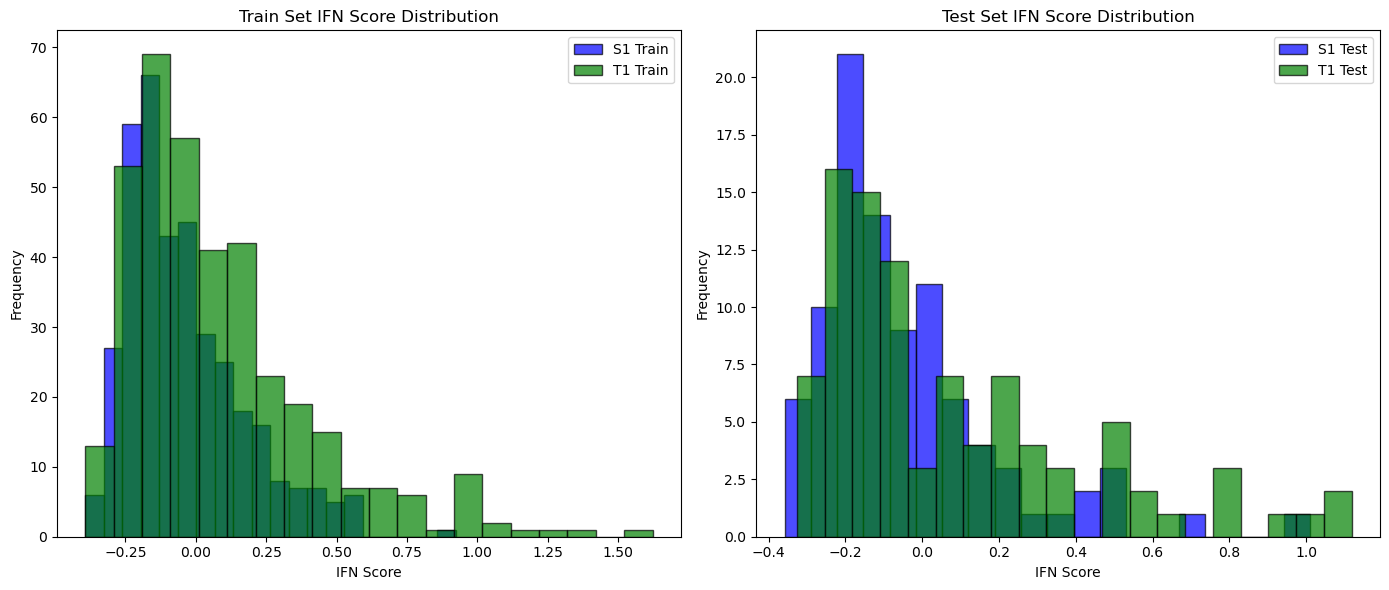

In [74]:
# plot the IFN score for train and  test subset
import matplotlib.pyplot as plt

# Plot IFN score distributions for train and test sets
plt.figure(figsize=(14, 6))

# Train distribution
plt.subplot(1, 2, 1)
plt.hist(y_s1_train, bins=20, alpha=0.7, label="S1 Train", color="blue", edgecolor="black")
plt.hist(y_t1_train, bins=20, alpha=0.7, label="T1 Train", color="green", edgecolor="black")
plt.title("Train Set IFN Score Distribution")
plt.xlabel("IFN Score")
plt.ylabel("Frequency")
plt.legend()

# Test distribution
plt.subplot(1, 2, 2)
plt.hist(y_s1_test, bins=20, alpha=0.7, label="S1 Test", color="blue", edgecolor="black")
plt.hist(y_t1_test, bins=20, alpha=0.7, label="T1 Test", color="green", edgecolor="black")
plt.title("Test Set IFN Score Distribution")
plt.xlabel("IFN Score")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

## Visualize Results

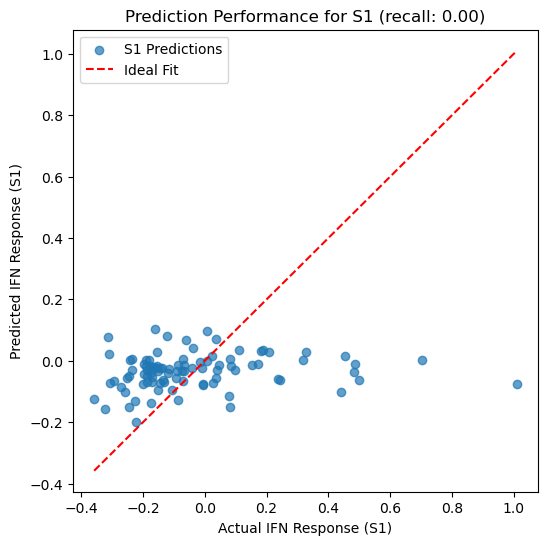

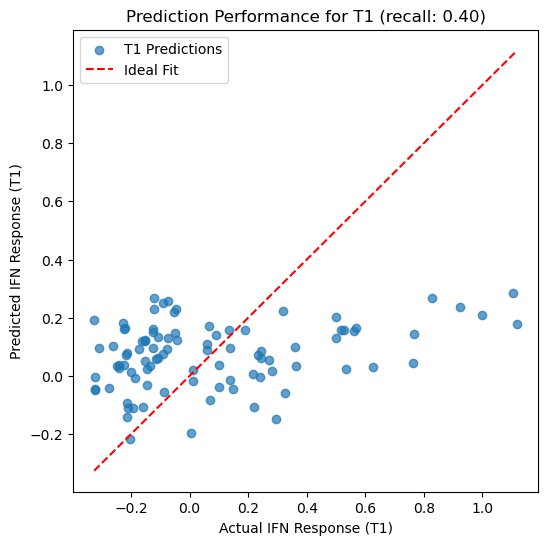

In [75]:
import matplotlib.pyplot as plt

# Visualization for S1
plt.figure(figsize=(6, 6))
plt.scatter(y_s1_test, y_s1_pred, alpha=0.7, label="S1 Predictions")
plt.plot([y_s1_test.min(), y_s1_test.max()], [y_s1_test.min(), y_s1_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual IFN Response (S1)")
plt.ylabel("Predicted IFN Response (S1)")
plt.title(f"Prediction Performance for S1 (recall: {recall_ks1:.2f})")
plt.legend()
plt.show()

# Visualization for T1
plt.figure(figsize=(6, 6))
plt.scatter(y_t1_test, y_t1_pred, alpha=0.7, label="T1 Predictions")
plt.plot([y_t1_test.min(), y_t1_test.max()], [y_t1_test.min(), y_t1_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual IFN Response (T1)")
plt.ylabel("Predicted IFN Response (T1)")
plt.title(f"Prediction Performance for T1 (recall: {recall_kt1:.2f})")
plt.legend()
plt.show()


# Tune Parameters 

In [118]:
params = {
    "n_estimators": 100, 
    "learning_rate": 0.1, 
    "max_depth": 3, 
    "random_state": 42,
    'device': 'mps'
}

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint

# Define parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['sqrt', 'log2', None]
} # TODO do these parameters make sense?

# Initialize GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

"""
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)
"""

# Fit the model
random_search.fit(X_s1_train, y_s1_train)

# Output the best parameters and the corresponding score
print("Best parameters:", random_search.best_params_)
print("Best score:", -random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'learning_rate': 0.010518486277398677, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 57, 'subsample': 0.910590063177311}
Best score: 0.04978820416179372


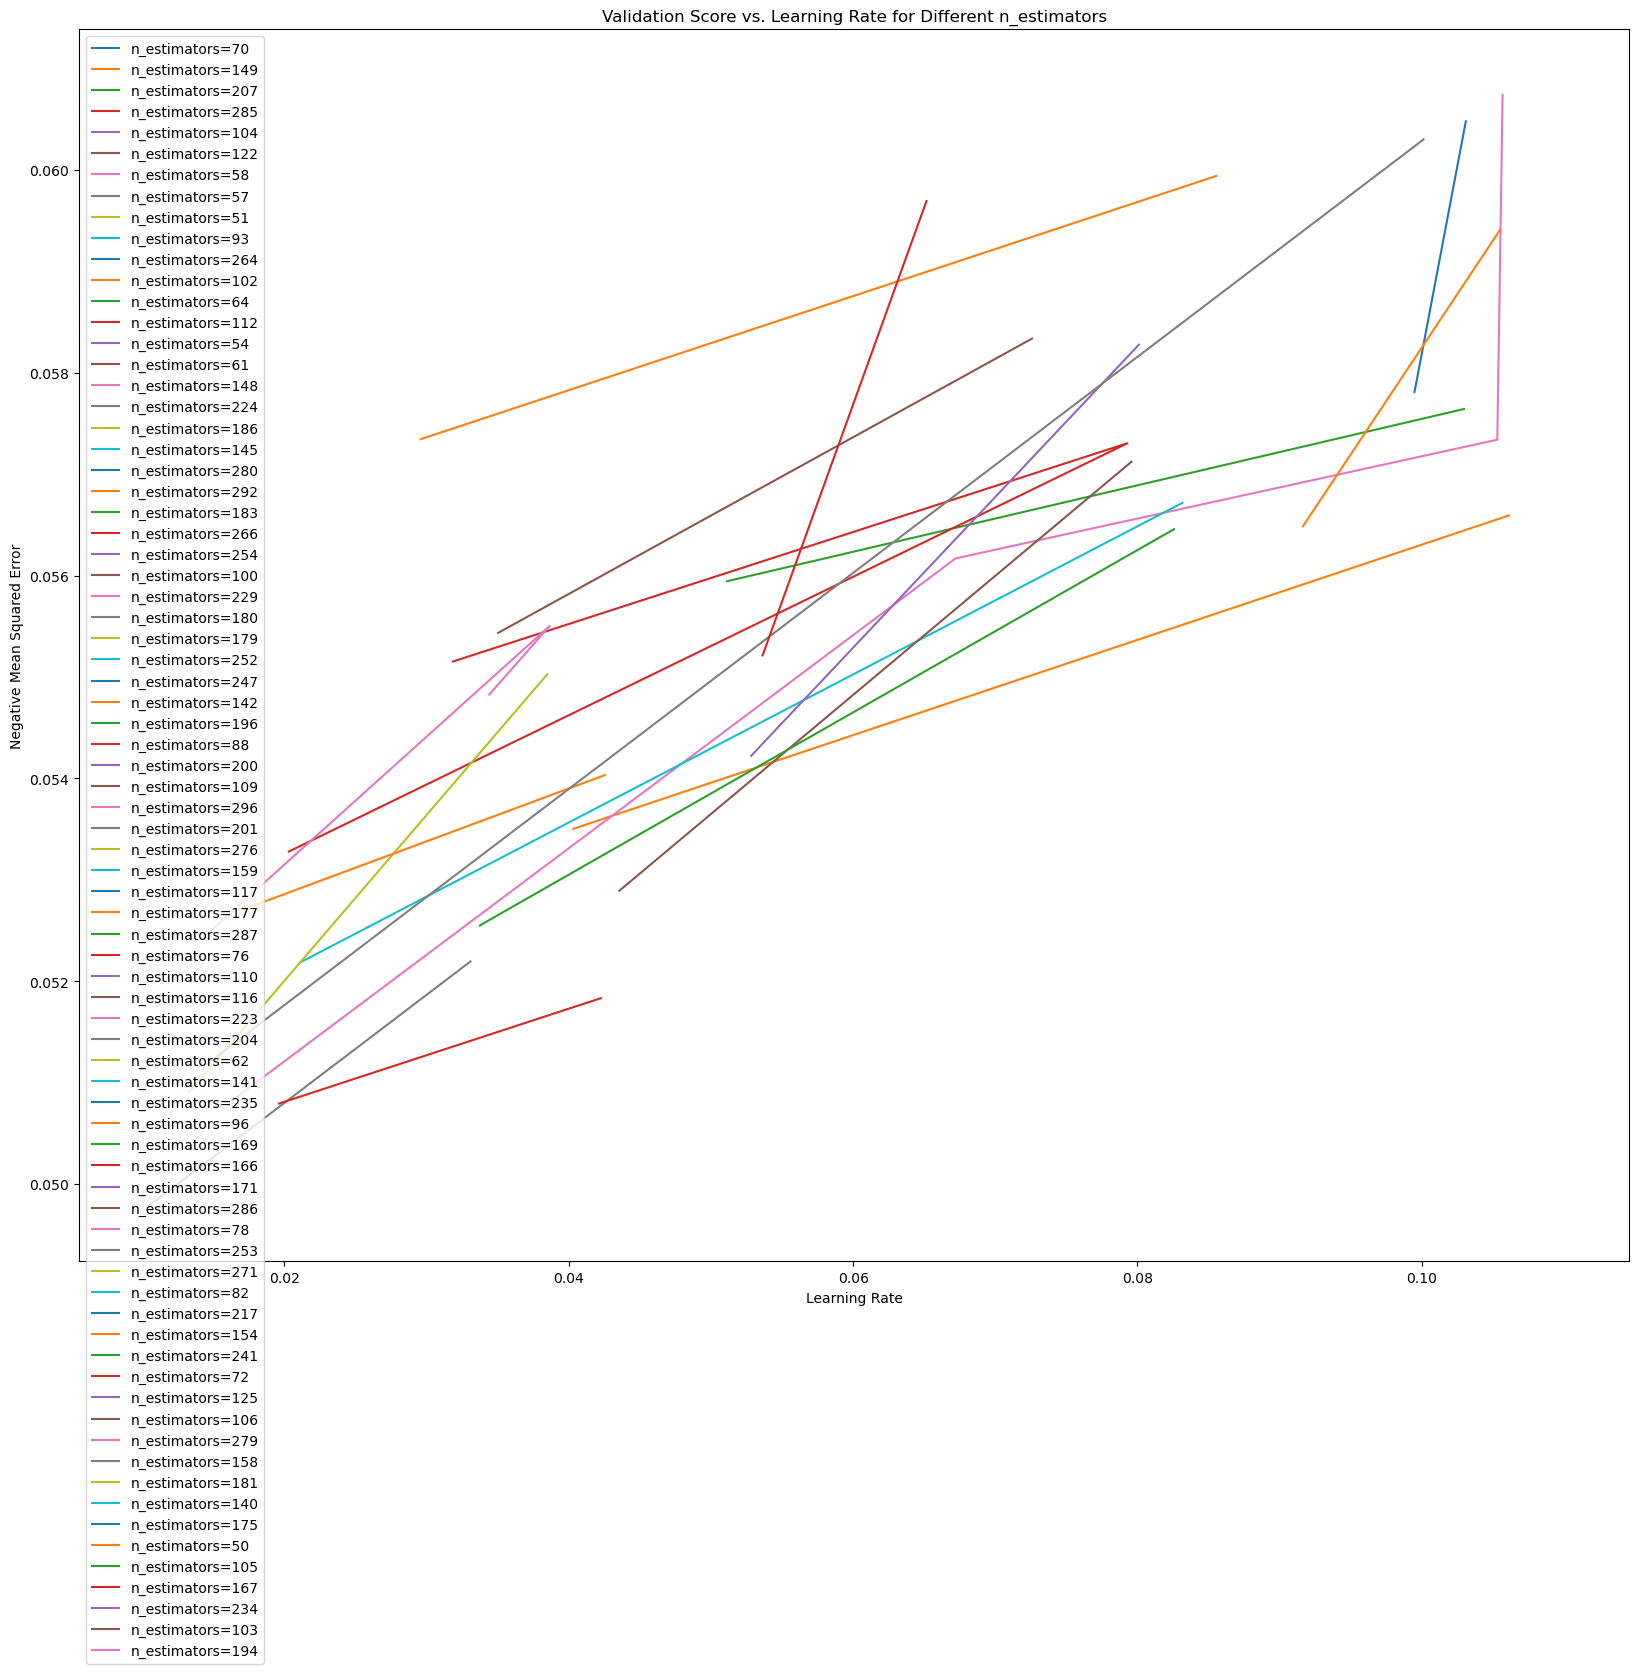

In [126]:
#Plotting param tunign results
results = pd.DataFrame(random_search.cv_results_)

# Example: Visualizing validation score for different learning rates
plt.figure(figsize=(20, 16))
for n_estimators in results['param_n_estimators'].unique():
    subset = results[results['param_n_estimators'] == n_estimators]
    plt.plot(subset['param_learning_rate'], -subset['mean_test_score'], label=f'n_estimators={n_estimators}')

plt.xlabel('Learning Rate')
plt.ylabel('Negative Mean Squared Error')
plt.title('Validation Score vs. Learning Rate for Different n_estimators')
plt.legend()
plt.show()

## Using Pytorch

### Setting up Tensorboard to eval param tuning 
(code from I2DL lecture)

In [ ]:
device = torch.device('mps')

In [19]:
# import all the required packages
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import os
import shutil

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])  # mean and std have to be sequences (e.g. tuples),
                                                                      # therefore we should add a comma after the values

fashion_mnist_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=True,
                                                          download=True, transform=transform)

fashion_mnist_test_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=False,
                                                          download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(fashion_mnist_dataset, batch_size=8)

testloader = torch.utils.data.DataLoader(fashion_mnist_test_dataset, batch_size=8)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.cpu().mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

os.environ['KMP_DUPLICATE_LIB_OK']='True' # To prevent the kernel from dying.

path = os.path.abspath("logs")
if os.path.exists(path):
    shutil.rmtree(path)
os.makedirs(path, exist_ok=True)

ModuleNotFoundError: No module named 'torch'